# Tree Model with Spotify popularity of a new song
This model will run the model with "Genre" and "Chord"

## Problem Definition



This project will take data features collected for songs that have been on the Top 200 Weekly (Global) charts of Spotify in 2020 & 2021. **The popularity of the song will be predicted using a tree-based regression model trained on some of these features.**

**Minimize the cross-validated root mean squared error ( RMSE ) when predicting the popularity of a new song.**

Determine the importance of the features in driving the regression result. The project should be done using tree-based regression techniques as covered in class. The parameters of the trees should be carefully selected to avoid over-fitting.

 This is  a categorical supervised classification problem since I am looking at popularity as the target. This project will use a regression model consistent with what is best suited for it's data.


##Challenges
There are two main challenges for this project:

Choosing appropriate predictors. When building a machine learning model, we want to make sure that we consider how the model will be ultimately used. For this project, we are predicting the popularity of a new song. Therefore, we should only include the predictors we would have for a new song.

Data cleaning and feature engineering. Some creative cleaning and/or feature engineering may be needed to extract useful information for prediction.

## Data Collection/Sources


### Data Overview

### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error


import seaborn as sns
import pickle

import graphviz
from IPython.display import display
from sklearn import tree

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import json
from sklearn.preprocessing import LabelEncoder

### File Paths

### Load Data

In [ ]:
spotify_transfer = pd.read_json( 'spotify_transfer.json', orient = "table")
spotify_transfer.head()

,Streams,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Genre
0,48633449,3377762,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589,B,"['indie rock italiano', 'italian pop']"
1,47248719,2230022,99.0,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478,C#/Db,['australian hip hop']
2,40162559,6266514,99.0,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688,A,['pop']
3,37799456,83293380,98.0,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591,B,"['pop', 'uk pop']"
4,33948454,5473565,96.0,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000.0,0.894,D#/Eb,"['lgbtq+ hip hop', 'pop rap']"


In [ ]:
spotify_transfer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1545 entries, 0 to 1555
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Streams           1545 non-null   Int64  
 1   Artist Followers  1545 non-null   Int64  
 2   Popularity        1545 non-null   float64
 3   Danceability      1545 non-null   float64
 4   Energy            1545 non-null   float64
 5   Loudness          1545 non-null   float64
 6   Speechiness       1545 non-null   float64
 7   Acousticness      1545 non-null   float64
 8   Liveness          1545 non-null   float64
 9   Tempo             1545 non-null   float64
 10  Duration (ms)     1545 non-null   float64
 11  Valence           1545 non-null   float64
 12  Chord             1545 non-null   object 
 13  Genre             1545 non-null   object 
dtypes: Int64(2), float64(10), object(2)
memory usage: 184.1+ KB


In [ ]:
spotify_column = spotify_transfer.columns
spotify_column

Index(['Streams', 'Artist Followers', 'Popularity', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo',
       'Duration (ms)', 'Valence', 'Chord', 'Genre'],
      dtype='object')

In [ ]:
spotify_transfer.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Streams,1545.0,6337136.377994,3375402.182363,4176083.0,4915080.0,5269163.0,6452492.0,48633449.0
Artist Followers,1545.0,14716902.866667,16675788.510875,4883.0,2123734.0,6852509.0,22698747.0,83337783.0
Popularity,1545.0,70.08932,15.824034,0.0,65.0,73.0,80.0,100.0
Danceability,1545.0,0.689997,0.142444,0.15,0.599,0.707,0.796,0.98
Energy,1545.0,0.633495,0.161577,0.054,0.532,0.642,0.752,0.97
Loudness,1545.0,-6.348474,2.509281,-25.166,-7.491,-5.99,-4.711,1.509
Speechiness,1545.0,0.123656,0.110383,0.0232,0.0456,0.0765,0.165,0.884
Acousticness,1545.0,0.248695,0.250326,0.000025,0.0485,0.161,0.388,0.994
Liveness,1545.0,0.181202,0.144071,0.0197,0.0966,0.124,0.217,0.962
Tempo,1545.0,122.811023,29.591088,46.718,97.96,122.012,143.86,205.272


## Data Cleaning

###Encode

This will be done in the third run. The second run will only consist of the features identified from the feature importance.
The second run notebook will be called Spotify_Feature_Importance_Run
The third will be called "Spotify_Encode_Run"

In [ ]:
spotify_transfer = pd.get_dummies(spotify_transfer, columns=["Chord"])
print(type(spotify_transfer))

label_encoder = LabelEncoder()
spotify_transfer["Genre Label"] = label_encoder.fit_transform(spotify_transfer['Genre'])
print(type(spotify_transfer))
spotify_encoded = spotify_transfer


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
#Help from ChatGpt not necesarily needed although i wanted to see it next to "Genre" I will be dropping the original column "Genre"
# Reorder columns to place 'Genre_Label' next to 'Genre'
#spotify_transfer = spotify_transfer[['Genre', 'Genre_Label'] + [col for col in spotify_transfer.columns if col not in ['Genre', 'Genre_Label']]]

In [ ]:
pd.set_option('display.max_columns', None)
spotify_encoded.head()

,Streams,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Genre,Chord_A,Chord_A#/Bb,Chord_B,Chord_C,Chord_C#/Db,Chord_D,Chord_D#/Eb,Chord_E,Chord_F,Chord_F#/Gb,Chord_G,Chord_G#/Ab,Genre Label
0,48633449,3377762,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589,"['indie rock italiano', 'italian pop']",False,False,True,False,False,False,False,False,False,False,False,False,276
1,47248719,2230022,99.0,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478,['australian hip hop'],False,False,False,False,True,False,False,False,False,False,False,False,63
2,40162559,6266514,99.0,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688,['pop'],True,False,False,False,False,False,False,False,False,False,False,False,364
3,37799456,83293380,98.0,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591,"['pop', 'uk pop']",False,False,True,False,False,False,False,False,False,False,False,False,363
4,33948454,5473565,96.0,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000.0,0.894,"['lgbtq+ hip hop', 'pop rap']",False,False,False,False,False,False,True,False,False,False,False,False,312


In [ ]:
spotify_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1545 entries, 0 to 1555
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Streams           1545 non-null   Int64  
 1   Artist Followers  1545 non-null   Int64  
 2   Popularity        1545 non-null   float64
 3   Danceability      1545 non-null   float64
 4   Energy            1545 non-null   float64
 5   Loudness          1545 non-null   float64
 6   Speechiness       1545 non-null   float64
 7   Acousticness      1545 non-null   float64
 8   Liveness          1545 non-null   float64
 9   Tempo             1545 non-null   float64
 10  Duration (ms)     1545 non-null   float64
 11  Valence           1545 non-null   float64
 12  Genre             1545 non-null   object 
 13  Chord_A           1545 non-null   bool   
 14  Chord_A#/Bb       1545 non-null   bool   
 15  Chord_B           1545 non-null   bool   
 16  Chord_C           1545 non-null   bool   
 17  

### Drop Column
Lets drop the column "Genre" since its still in the data frame and we already LabelEncoded this column.

In [ ]:
spotify_encoded = spotify_encoded.drop(columns = ["Genre", "Speechiness", "Tempo", "Liveness", "Energy", "Duration (ms)", "Valence"])

In [ ]:
spotify_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1545 entries, 0 to 1555
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Streams           1545 non-null   Int64  
 1   Artist Followers  1545 non-null   Int64  
 2   Popularity        1545 non-null   float64
 3   Danceability      1545 non-null   float64
 4   Loudness          1545 non-null   float64
 5   Acousticness      1545 non-null   float64
 6   Chord_A           1545 non-null   bool   
 7   Chord_A#/Bb       1545 non-null   bool   
 8   Chord_B           1545 non-null   bool   
 9   Chord_C           1545 non-null   bool   
 10  Chord_C#/Db       1545 non-null   bool   
 11  Chord_D           1545 non-null   bool   
 12  Chord_D#/Eb       1545 non-null   bool   
 13  Chord_E           1545 non-null   bool   
 14  Chord_F           1545 non-null   bool   
 15  Chord_F#/Gb       1545 non-null   bool   
 16  Chord_G           1545 non-null   bool   
 17  

###Check for nulls

In [ ]:
spotify_encoded.isnull().sum().sum()

0

In [ ]:
#spotify_transfer.describe(include = 'all').transpose()
spotify_encoded.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Streams,1545.0,<NA>,<NA>,<NA>,6337136.377994,3375402.182363,4176083.0,4915080.0,5269163.0,6452492.0,48633449.0
Artist Followers,1545.0,<NA>,<NA>,<NA>,14716902.866667,16675788.510875,4883.0,2123734.0,6852509.0,22698747.0,83337783.0
Popularity,1545.0,NaN,NaN,NaN,70.08932,15.824034,0.0,65.0,73.0,80.0,100.0
Danceability,1545.0,NaN,NaN,NaN,0.689997,0.142444,0.15,0.599,0.707,0.796,0.98
Loudness,1545.0,NaN,NaN,NaN,-6.348474,2.509281,-25.166,-7.491,-5.99,-4.711,1.509
Acousticness,1545.0,NaN,NaN,NaN,0.248695,0.250326,0.000025,0.0485,0.161,0.388,0.994
Chord_A,1545,2,False,1427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chord_A#/Bb,1545,2,False,1423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chord_B,1545,2,False,1404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chord_C,1545,2,False,1390,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###DF to json

In [ ]:
spotify_encoded.to_json(path_or_buf="spotify_encoded.json", orient = "table")

## Exploratory Data Analysis


### Feature Correlation
Utilizing a heatmap and a pairplot

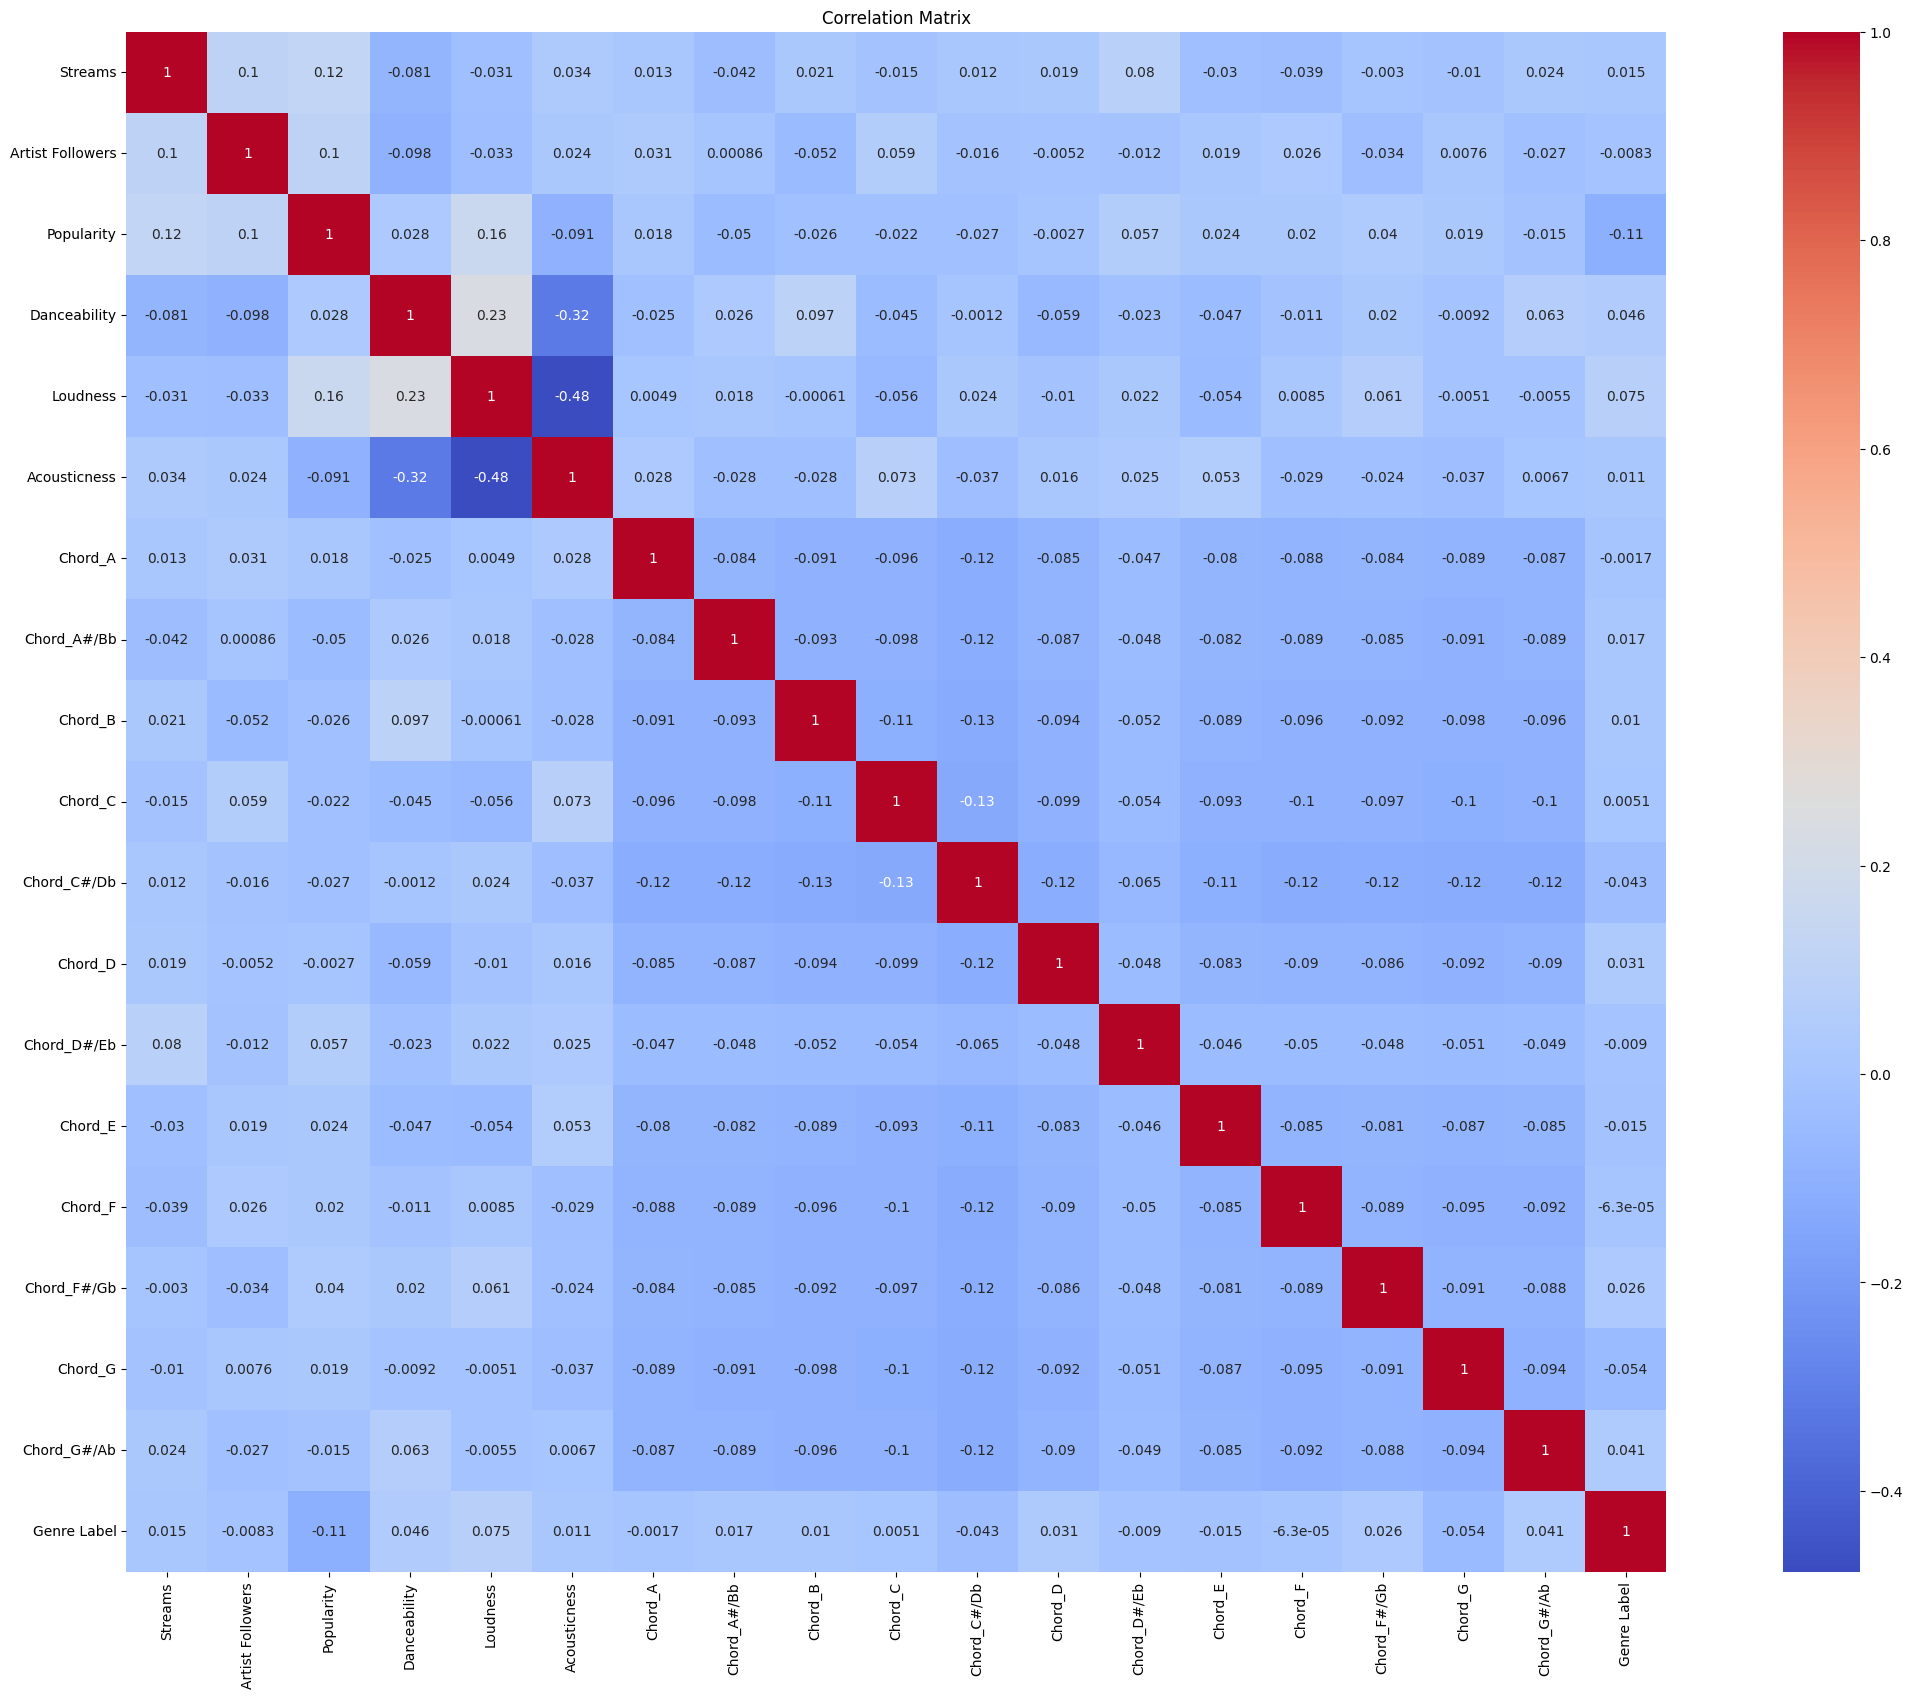

In [ ]:
# Correlation matrix
correlation_matrix = spotify_encoded.corr()
plt.figure(figsize=(30,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
sns.pairplot(spotify_encoded)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Data Processing


####Decision Tree Regression


This section is under construction to loop through the columns and find the one that is best suited for a target. It needs some work to identify the best max depth for each target/column

In [ ]:
columns_to_iterate = spotify_encoded.columns
columns_to_iterate

Index(['Streams', 'Artist Followers', 'Popularity', 'Danceability', 'Loudness',
       'Acousticness', 'Chord_A', 'Chord_A#/Bb', 'Chord_B', 'Chord_C',
       'Chord_C#/Db', 'Chord_D', 'Chord_D#/Eb', 'Chord_E', 'Chord_F',
       'Chord_F#/Gb', 'Chord_G', 'Chord_G#/Ab', 'Genre Label'],
      dtype='object')

In [ ]:
#I still need to work on optimizing the max depth in this loop for each feature/column

rmse_dict = {}

for column in columns_to_iterate:
  X = spotify_encoded.drop(column, axis = 1)
  y = spotify_encoded[column]

  numLoops = 500

  rms_error = np.zeros(numLoops)

  for idx in range(0,numLoops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    model = DecisionTreeRegressor(max_depth=3)         # Arbitrarily choosing max_depth of 3
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

  rmse_each = rms_error.mean().round(2)
  rmse_dict[column] = rmse_each

#print(f"CV RMSE: {rms_error.mean().round(2)*1000}")
#print(f"CV RMSE: {rms_error.mean().round(2)}")





In [ ]:
rmse_dict

{'Streams': 2106272.83,
 'Artist Followers': 14526673.14,
 'Popularity': 10.58,
 'Danceability': 0.14,
 'Loudness': 2.12,
 'Acousticness': 0.21,
 'Chord_A': 0.26,
 'Chord_A#/Bb': 0.26,
 'Chord_B': 0.28,
 'Chord_C': 0.29,
 'Chord_C#/Db': 0.34,
 'Chord_D': 0.27,
 'Chord_D#/Eb': 0.16,
 'Chord_E': 0.26,
 'Chord_F': 0.27,
 'Chord_F#/Gb': 0.27,
 'Chord_G': 0.28,
 'Chord_G#/Ab': 0.27,
 'Genre Label': 106.46}

In [ ]:
spotify_encoded.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Streams,1545.0,6337136.377994,3375402.182363,4176083.0,4915080.0,5269163.0,6452492.0,48633449.0
Artist Followers,1545.0,14716902.866667,16675788.510875,4883.0,2123734.0,6852509.0,22698747.0,83337783.0
Popularity,1545.0,70.08932,15.824034,0.0,65.0,73.0,80.0,100.0
Danceability,1545.0,0.689997,0.142444,0.15,0.599,0.707,0.796,0.98
Loudness,1545.0,-6.348474,2.509281,-25.166,-7.491,-5.99,-4.711,1.509
Acousticness,1545.0,0.248695,0.250326,0.000025,0.0485,0.161,0.388,0.994
Genre Label,1545.0,222.137864,112.535578,0.0,113.0,221.0,317.0,393.0


####Model

In [ ]:
X = spotify_encoded.drop('Popularity', axis = 1)
y = spotify_encoded['Popularity']

In [ ]:
numLoops = 500

rms_error = np.zeros(numLoops)


for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = DecisionTreeRegressor(max_depth=3)         #choosing max_depth of 3 verify the value used with tree depth code block below
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))



print(f"CV RMSE: {rms_error.mean().round(2)}")



CV RMSE: 10.58


This is how we choose the tree depth

In [ ]:
max_depths = [1,2,3,4,5,6,7,8,9,10]
rms_depth = np.zeros(len(max_depths))
std_depth = np.zeros(len(max_depths))

numLoops = 500

for n, depth in enumerate(max_depths):
  rms_error = np.zeros(numLoops)

  for idx in range(0,numLoops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

  rms_depth[n] = rms_error.mean()
  std_depth[n] = rms_error.std( ddof = 1 )

In [ ]:
pd.DataFrame( zip( max_depths, rms_depth, std_depth ) )

,0,1,2
0,1,13.153913,0.772507
1,2,10.584685,0.651064
2,3,10.565673,0.713210
3,4,10.438193,0.775436
4,5,10.363688,0.796264
5,6,10.477838,0.784247
6,7,10.453041,0.839062
7,8,10.552816,0.834696
8,9,10.849631,0.834089
9,10,11.040683,0.856560


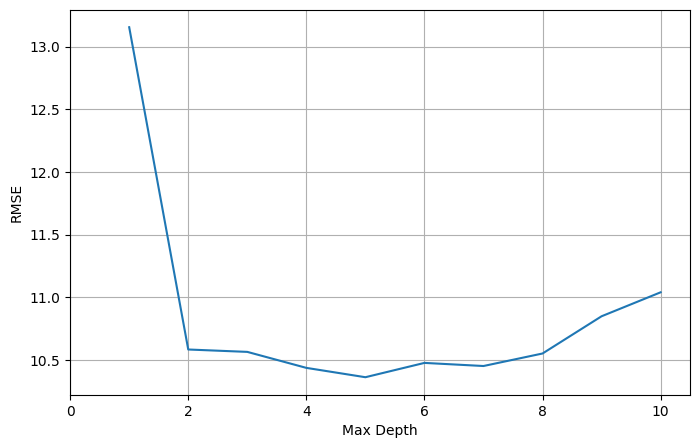

In [ ]:
# Decision Tree Plot result for visualizing depth at 3 where the RMSE hinges towards a higher RMSE
plt.figure(figsize = (8,5))
plt.plot(max_depths, rms_depth)
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.xlim(0, 10.5)
plt.grid()

Rerun with max depth to optimal where rms is lowest and std is lowest
max depth = 3

In [ ]:
# Re run with max depth = 3
numLoops = 500

rms_error = np.zeros( numLoops )

for idx in range( 0, numLoops ):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2 )
  model = DecisionTreeRegressor( max_depth= 6 )
  model.fit( X_train, y_train )
  y_pred = model.predict( X_test )
  rms_error[idx] = np.sqrt( mean_squared_error( y_test, y_pred ) )

print(f"CV RMSE: {rms_error.mean().round(2)}")

CV RMSE: 10.42


### Data Visualization


In [ ]:
# # Option 1
# display(
#   graphviz.Source(
#     tree.export_graphviz(
#       model,
#       feature_names = X.columns,
#       filled = True,
#     )
#   )
# )

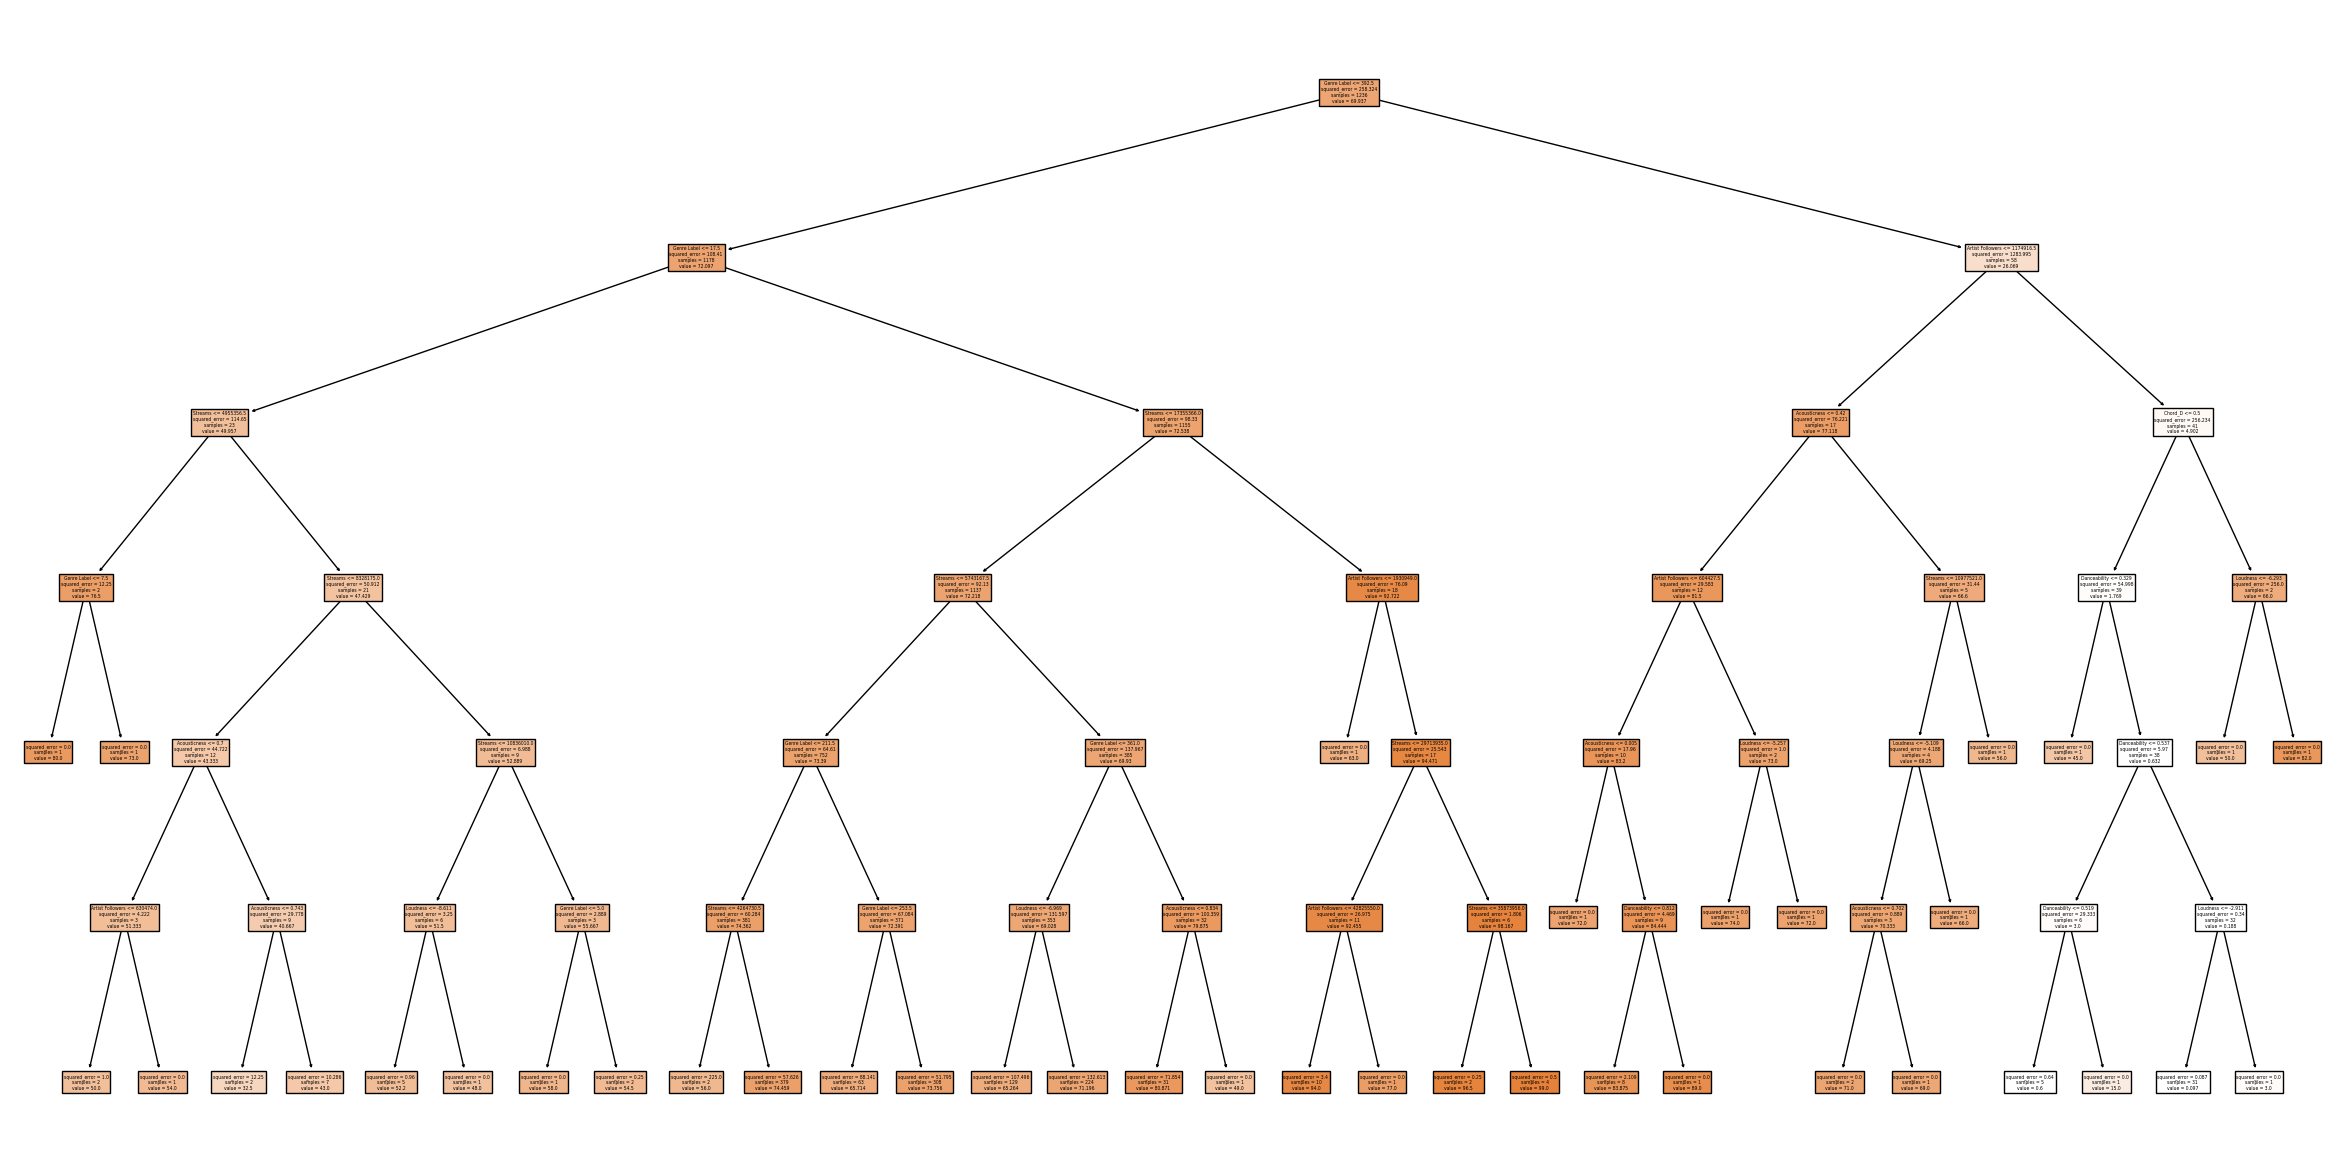

In [ ]:
# Option 2
plt.figure(figsize=(30,15))
tree_plot = tree.plot_tree(
  model,
  feature_names = X.columns,
  filled=True,
)

###Random Forest

In [ ]:
X = spotify_encoded.drop('Popularity', axis = 1)
y = spotify_encoded['Popularity']

In [ ]:
# two parameters - n_estimators (number of trees), max_depth (number of splits)
numLoops = 500

mean_error = np.zeros(numLoops)

# np.random.seed(42)
for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2 )
  model = RandomForestRegressor( n_estimators = 3 ) #n_estimators is number of trees in forest. Note: you can also choose max_depth for RFs
  model.fit( X_train, y_train )
  y_pred = model.predict( X_test )
  mean_error[idx] = mean_squared_error( y_test, y_pred )

print(f'RMSE: {np.sqrt(mean_error).mean()}')
print(f'RMSE_std: {np.sqrt(mean_error).std()}')
#np.sqrt(mean_error)[:50]

RMSE: 10.753883682501993
RMSE_std: 0.7355615730306504


####How do you choose number of trees?

In [ ]:
num_trees = range(10,60,10)
cv_loops = 100
rmse_results = np.zeros(len(num_trees))
std_results = np.zeros(len(num_trees))

for n, trees in enumerate(num_trees):
  rmse_cv = np.zeros(cv_loops)
  np.random.seed(42)
  for i in range(cv_loops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
    rfModel = RandomForestRegressor( n_estimators=trees )
    rfModel.fit(X_train, y_train)
    y_pred_rf = rfModel.predict(X_test)
    rmse_cv[i] = np.sqrt(mean_squared_error(y_test, y_pred_rf))

  print(trees,' trees finished.')
  rmse_results[n] = rmse_cv.mean()
  std_results[n] = rmse_cv.std()


10  trees finished.
20  trees finished.
30  trees finished.
40  trees finished.
50  trees finished.


In [ ]:
pickle.dump(rfModel, open('rfModel.p','wb'))

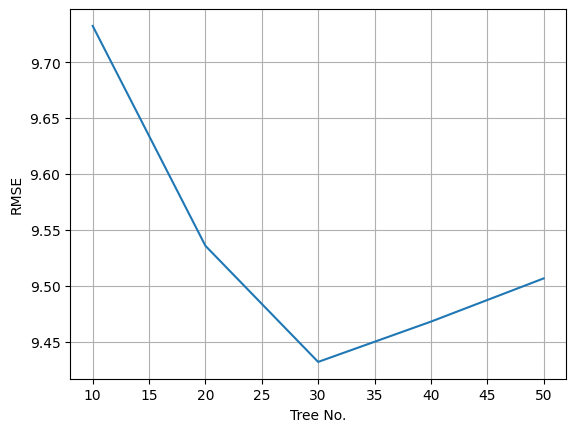

In [ ]:
plt.plot(num_trees, rmse_results)
plt.xlabel('Tree No.')
plt.ylabel('RMSE')
plt.grid()

In [ ]:
pd.DataFrame( zip( rmse_results, std_results, ) )

,0,1
0,9.732420,0.753882
1,9.535835,0.834479
2,9.432032,0.742680
3,9.468049,0.652736
4,9.506679,0.648794


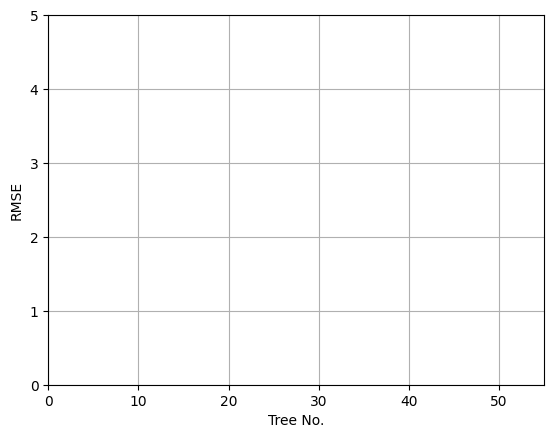

In [ ]:
# plt.errorbar(num_trees, rmse_results, yerr=(std_results*2,std_results*2))
plt.errorbar(num_trees, rmse_results, yerr=std_results)
plt.xlabel('Tree No.')
plt.ylabel('RMSE')
plt.ylim(0,5)
plt.xlim(0,55)
plt.grid()

In [ ]:
print(f'RMSE with 30 trees: {rmse_results[2]}')

RMSE with 30 trees: 9.432031811917941


In [ ]:
len(rfModel.estimators_)

50

####Second Run of Random Forest
I changed the n_estimators to reflect the number that we arrived with from plotting plt.plot(num_trees, rmse_results)

In [ ]:
# two parameters - n_estimators (number of trees), max_depth (number of splits)
numLoops = 500

mean_error = np.zeros(numLoops)

# np.random.seed(42)
for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2 )
  model = RandomForestRegressor( n_estimators = 30 ) # I adjust to 30 as shown above in previous code block n_estimators is number of trees in forest. Note: you can also choose max_depth for RFs
  model.fit( X_train, y_train )
  y_pred = model.predict( X_test )
  mean_error[idx] = mean_squared_error( y_test, y_pred )

print(f'RMSE: {np.sqrt(mean_error).mean()}')
print(f'RMSE_std: {np.sqrt(mean_error).std()}')
#np.sqrt(mean_error)[:50]

RMSE: 9.524451335134316
RMSE_std: 0.7016992762793062


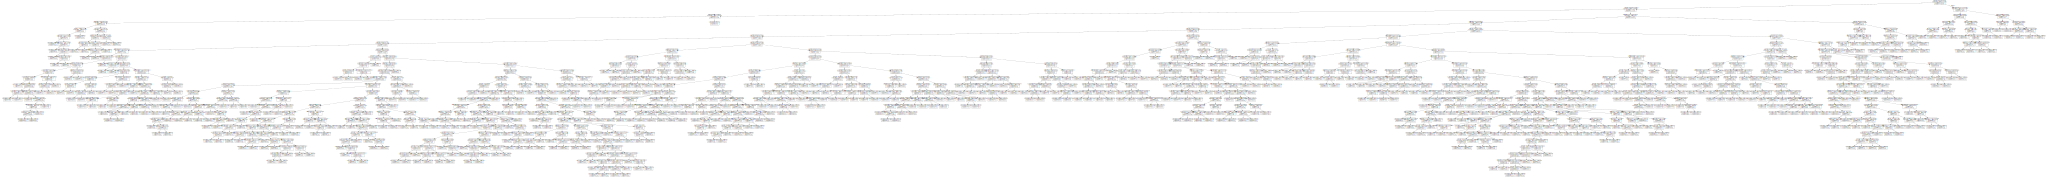

In [ ]:
# Display one tree from the random forest
display(
  graphviz.Source(
    tree.export_graphviz(
      rfModel.estimators_[0],
      feature_names = X.columns,
    )
  )
)

####Find Important Predictors

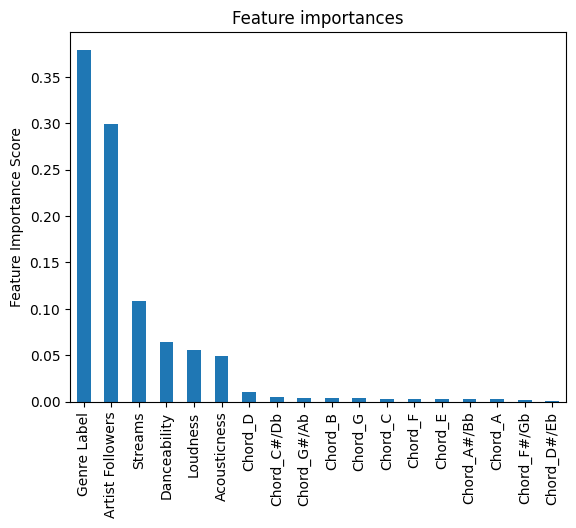

In [ ]:
importances = rfModel.feature_importances_
forest_importances = pd.Series( importances, index = X.columns )

plt.figure()
# forest_importances.plot.bar()
forest_importances.sort_values( ascending = False ).plot.bar()
plt.title("Feature importances")
plt.ylabel('Feature Importance Score') ;

We will try and run the features that have the most feature importance. I will try and use only from Artist Followers to Acoustincness and run only those in the model to see if the model improves. This is skewed some for the fact that since i have the "Chord" features one-hot encoded they appear to not give importance. The model does perform better slightly with these in the model.

In [ ]:
( forest_importances.sort_values( ascending = False ) * 100 ).cumsum()

Genre Label          37.920954
Artist Followers     67.881715
Streams              78.678636
Danceability         85.149502
Loudness             90.754371
Acousticness         95.663225
Chord_D              96.719863
Chord_C#/Db          97.213909
Chord_G#/Ab          97.612406
Chord_B              97.986261
Chord_G              98.337819
Chord_C              98.647158
Chord_F              98.954843
Chord_E              99.225360
Chord_A#/Bb          99.468541
Chord_A              99.703751
Chord_F#/Gb          99.888360
Chord_D#/Eb         100.000000
dtype: float64

###XGBoost


In [ ]:
X = spotify_encoded.drop('Popularity', axis = 1)
y = spotify_encoded['Popularity']

In [ ]:
numLoops = 100
mse_xgb  = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)
  xgbr = xgb.XGBRegressor(objective ='reg:squarederror', verbosity=0, seed = 10)
  xgbr.fit(X_train,y_train)
  y_pred_xgb = xgbr.predict(X_test)
  mse_xgb[idx] = mean_squared_error(y_test,y_pred_xgb)


print(f'RMSE: {np.sqrt(mse_xgb).mean()}')

RMSE: 9.844266161484489


####XGBoost with Parameters

Now we will see if we can improve performance by changing some parameters

In [ ]:
# Specify the parameters you want to try and their ranges.
param_test = {
 'max_depth'     : [ 3, 4, 5, 6, 7 ],
 'learning_rate' : [ 0.1, 0.2, 0.3, 0.4 ],
 'n_estimators'  : [ 20, 40, 60, 80, 100, 120, 140 ],
}

# Perform the grid search
gsearch = GridSearchCV(
    estimator = xgb.XGBRegressor( objective = 'reg:squarederror', seed = 10 ),
    param_grid = param_test,
    scoring = 'neg_mean_squared_error',
    cv = 5,
)

# Fit to training data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05, random_state = 42 )
model = gsearch.fit(X_train,y_train)

# See grid search results
print(model.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


Now we will fit our XGBoost model with the best parameters

In [ ]:
numLoops = 100
mse_xgb  = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.15 )
  xgbr = xgb.XGBRegressor(
      objective ='reg:squarederror',
      verbosity=0,
      learning_rate = 0.1,
      max_depth = 3,
      n_estimators = 100,
      seed = 10,
  )
  xgbr.fit(X_train,y_train)
  y_pred_xgb = xgbr.predict(X_test)
  mse_xgb[idx] = mean_squared_error(y_test,y_pred_xgb)

print(f'RMSE: {np.sqrt(mse_xgb).mean()}')

RMSE: 9.417077745166404


Feature Importance

<ipython-input-48-16d4b8a6cfd6>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( ax.get_xticklabels(), rotation = 90 )


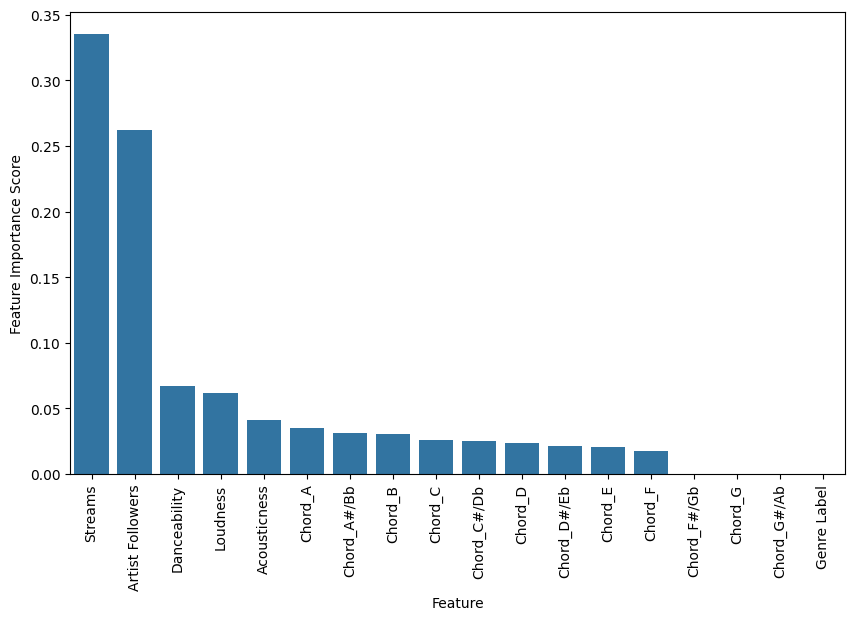

In [ ]:
feat_imp = pd.Series(xgbr.feature_importances_, index=X.columns)
plt.figure(figsize = (10,6))
# ax = sns.barplot(x = feat_imp.index, y = feat_imp.values)
ax = sns.barplot(x = feat_imp.index, y = feat_imp.sort_values( ascending = False ).values )
ax.set_xticklabels( ax.get_xticklabels(), rotation = 90 )
plt.xlabel('Feature')
plt.ylabel('Feature Importance Score') ;

In [ ]:
(feat_imp.sort_values( ascending = False )*100).cumsum()

Genre Label         33.522892
Artist Followers    59.764580
Loudness            66.476746
Streams             72.686607
Chord_B             76.845634
Danceability        80.328377
Chord_G             83.471466
Chord_G#/Ab         86.514030
Acousticness        89.087746
Chord_D#/Eb         91.624168
Chord_A#/Bb         93.993340
Chord_F#/Gb         96.147934
Chord_D             98.234131
Chord_C#/Db         99.998199
Chord_C             99.999992
Chord_A             99.999992
Chord_E             99.999992
Chord_F             99.999992
dtype: float32

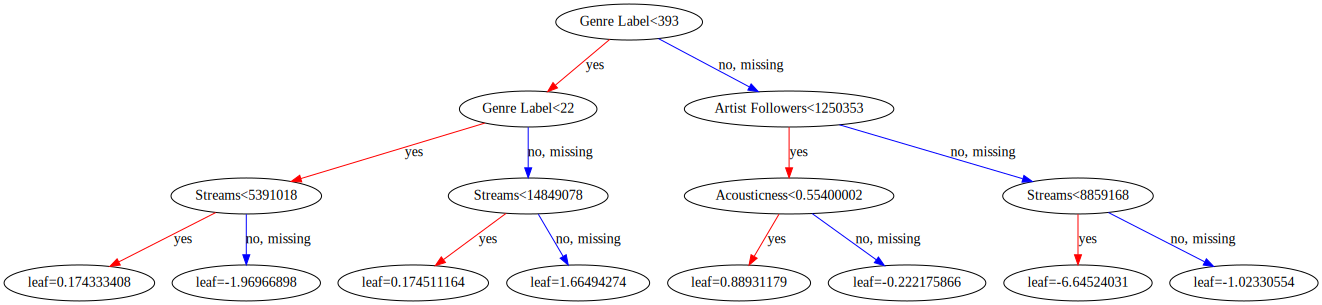

In [ ]:
# #help from chatgpt to save it to a pdf and display in notebook.
# # Get the tree as a graphviz object
# dot_data = xgb.to_graphviz(xgbr, num_trees=0)  # Visualize the first tree

# # Render and save the tree as a .dot file
# with open("tree.dot", "w") as f:
#     f.write(dot_data.source)

# # Render the tree to a PDF file
# dot_data.render("tree")

# # Alternatively, visualize directly in a Jupyter Notebook
# from IPython.display import display

# display(dot_data)

In [ ]:
#dot_data = xgb.to_graphviz(xgbr, num_trees=0)

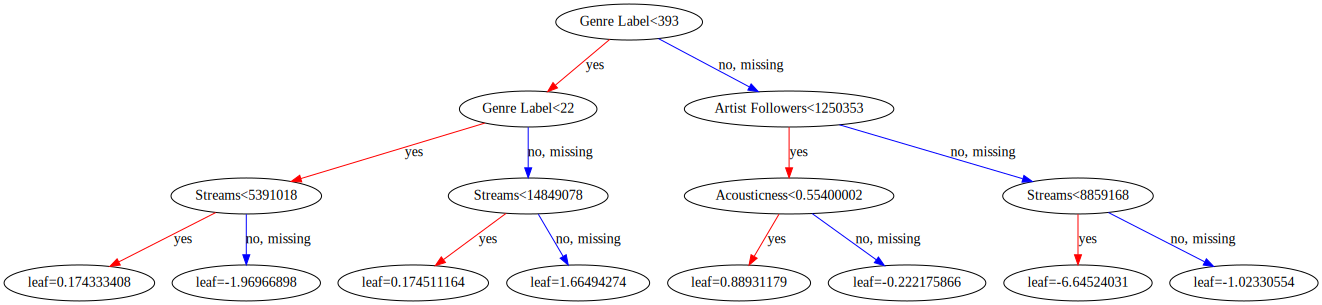

In [ ]:
# dot_data

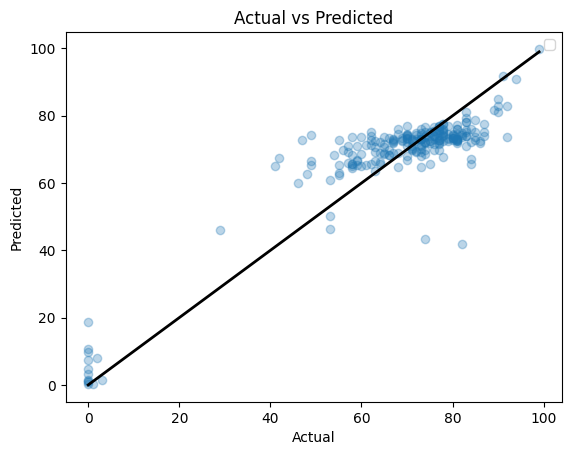

In [ ]:
y_pred = model.predict(X_test)
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()  #i need address this
plt.show()

In [64]:
len(spotify_encoded.columns)

19

####Results

This is for popularity as a target

- Decision Tree
  1.  CV RMSE: 10.72

- Random Forest
  1.  RMSE: 9.524451335134316
  1.  RMSE_std: 0.7016992762793062
- XGBoost
  1.  RMSE: 9.417077745166404

## Conclusion
For a baseline with the target "Popularity" the Random Forest performs the best with the lowest RMSE of 10.301.
The second run is to confirm the feature importance and after running that notebook the RMSE is 10.269 still performing the best is the Random Forest and confirming that the other features weren't as important to the model and could be slightly interpreted as the model performed better without them by .032

Encoding on this third notebook adding "Chord" and "Genre" using getdummies to one-hot encode "Chord" and using label encoding for "Genre" the best performing model is the XGBoost with a RMSE of 9.417

### Data Cleaning Function
under construction